## ETL archivo user-reviews

### Importo los modulos de pandas,gzip, matplotlib y textblob necesarios para la limpieza de datos, para descomprimir el archivo json.gz poder revisar algunas metricas iniciales a través de graficas y la creación de la columna de analisis de sentimiento

In [56]:
import pandas as pd
import gzip,ast
import matplotlib.pyplot as plt
from textblob import TextBlob

### Realizo la extracción y descompresión del archivo user_reviews.json.gz

In [12]:
data=[]
with gzip.open('user_reviews.json.gz','rb') as file:
    for line in file:
        lineaUnicode=line.decode('utf-8')
        data.append(lineaUnicode)

### Creo el DataFrame con la información del archivo y verifico la creación llamado las primeras cinco filas a través del metodo .head de pandas.

In [13]:
df_reviews = pd.DataFrame(data)
df_reviews.head()

,0
0,"{'user_id': '76561197970982479', 'user_url': '..."
1,"{'user_id': 'js41637', 'user_url': 'http://ste..."
2,"{'user_id': 'evcentric', 'user_url': 'http://s..."
3,"{'user_id': 'doctr', 'user_url': 'http://steam..."
4,"{'user_id': 'maplemage', 'user_url': 'http://s..."


### Se observa un DataFrame con un varios diccionarios dentro de sus filas. procedo a desanidar, en donde y organizar la información en un Dataframe en donde sus claves serán sus campos y los valores la información. Pero antes debo eliminar los caracteres no validos dentro del diccionario.

In [14]:
# Elimino caracteres no validos dentro del diccionario.

for i in range(len(data)):
    data[i]=data[i].encode('utf-8','ignore').decode('utf-8')

In [15]:
# desanido los diccionarios
for i in range(len(data)):
    data[i]=ast.literal_eval(data[i])

In [16]:
# Creo el DatFrame desanidado. de user_reviews, verifico llamando las primeras cinco filas
dfUserReviews=pd.DataFrame(data)
dfUserReviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


### Se observa dentro del campo reviews del nuevo dataframe la información contenida dentro de una lista de diccionarios. Procedo a desanidar la lista de diccionarios del campo reviews.

In [17]:
def desanidar_lista(lista):
    if isinstance(lista,list):
        diccionario_resultante={}
        for diccionario in lista:
            diccionario_resultante.update(diccionario)
        return diccionario_resultante
    else:
        return lista
    
 

In [18]:
dfUserReviews['reviews']=dfUserReviews['reviews'].apply(desanidar_lista)

### Creo una copia del dataframe para organizar la información desanidada del campo reviews

In [19]:
dfCopy=dfUserReviews.copy()

### Concateno el nuevo dataframe con el campo reviews.

In [20]:
dfCopy = pd.concat([dfCopy.drop(['reviews'], axis=1), dfCopy['reviews'].apply(pd.Series)], axis=1)

/var/folders/yv/1ws10z49371b32qc3rr7q96r0000gn/T/ipykernel_970/3710037964.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  dfCopy = pd.concat([dfCopy.drop(['reviews'], axis=1), dfCopy['reviews'].apply(pd.Series)], axis=1)


In [21]:
# Reviso el nuevo DataFrame desanidado.
dfCopy.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
1,js41637,http://steamcommunity.com/id/js41637,,"Posted November 29, 2013.",,239030,1 of 4 people (25%) found this review helpful,True,Very fun little game to play when your bored o...
2,evcentric,http://steamcommunity.com/id/evcentric,,"Posted October 15, 2014.",,224500,No ratings yet,True,"Fun world builder, with plenty of option of ho..."
3,doctr,http://steamcommunity.com/id/doctr,,"Posted February 23, 2012.",,108710,No ratings yet,True,"Alan wake is a really good game, the light eff..."
4,maplemage,http://steamcommunity.com/id/maplemage,,"Posted July 11, 2013.",,204300,No ratings yet,True,"OH YES, THIS GAME IS THE BEST, THEY ADD STUFF ..."


In [28]:
# Reviso el nuevo DataFrame desanidado.
dfCopy.tail()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
25766,76561198306599751,http://steamcommunity.com/profiles/76561198306...,,Posted May 31.,,261030,0 of 1 people (0%) found this review helpful,True,I cried in the end its so sadding ]'; I wish l...
25767,Ghoustik,http://steamcommunity.com/id/Ghoustik,,Posted June 17.,,730,0 of 1 people (0%) found this review helpful,True,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...
25768,76561198310819422,http://steamcommunity.com/profiles/76561198310...,1 person found this review funny,Posted June 23.,,570,1 of 1 people (100%) found this review helpful,True,Well Done
25769,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
25770,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 2.,,440,No ratings yet,True,so much fun :D


### Reviso las caracteristicas del nuevo DataFrame, con la función .info de pandas.

In [22]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      25799 non-null  object
 1   user_url     25799 non-null  object
 2   funny        25771 non-null  object
 3   posted       25771 non-null  object
 4   last_edited  25771 non-null  object
 5   item_id      25771 non-null  object
 6   helpful      25771 non-null  object
 7   recommend    25771 non-null  object
 8   review       25771 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


### Observaciones.
### 1. hay datos faltantes se debe proceder con la eliminación.
### 2. El campo item_id es categorico se debe transformar a numerico int64. para futuras consultas.
### 3. Se observa que el campo funny y last_edit cuenta con strings sin información en la mayoria de sus filas. ( eliminar estos campos)
### 4. Se observa que el campo posted es de tipo categorico es necesario realizar la transformacion a datatime para futuras consultas.

In [23]:
# Eliminado datos faltantes
dfCopy.dropna(inplace=True)

In [24]:
# Reorganizo los indices despues de la eliminación de datos faltantes
dfCopy.reset_index(drop=True, inplace=True)
print(dfCopy.index)

RangeIndex(start=0, stop=25771, step=1)


In [25]:
# Verificando de nuevo el dataframe
# Se nota la reducción en cuanto al numero de filas
# despues de la eliminación de datos faltantes, todos los campos quedaron con igual numero de registros 25771 datos no nulos.
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      25771 non-null  object
 1   user_url     25771 non-null  object
 2   funny        25771 non-null  object
 3   posted       25771 non-null  object
 4   last_edited  25771 non-null  object
 5   item_id      25771 non-null  object
 6   helpful      25771 non-null  object
 7   recommend    25771 non-null  object
 8   review       25771 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


In [26]:
# Transformo el dato del campó item_id a int64.


dfCopy['item_id'] = pd.to_numeric(dfCopy['item_id'], errors='coerce' )

In [27]:
# Verico la transformación

dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      25771 non-null  object
 1   user_url     25771 non-null  object
 2   funny        25771 non-null  object
 3   posted       25771 non-null  object
 4   last_edited  25771 non-null  object
 5   item_id      25771 non-null  int64 
 6   helpful      25771 non-null  object
 7   recommend    25771 non-null  object
 8   review       25771 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.8+ MB


## Procesamiento de Fechas en el Campo "Posted" y Creación de Columna "Posted_date" del tipo datatime.
### pasos :
### 1. Me Asegúro de que el campo "posted" sea de tipo cadena (string).
### 2.  Realizo la Extracción del mes, el día y el año de la columna "posted" usando expresiones regulares.
### 3. Convierto el mes a número (1-12) utilizando un mapeo .
### 4. Encuentro el año más común en la columna "posted" utilizando el método mode(). para realizar la imputación con los campos sin año.
### 5. Reemplazo los valores no finitos (NaN o inf) en las columnas Month, Day y Year con valores por defecto.
### 6. Crea una columna "posted_date" con valores de fecha completos a partir de las columnas Year, Month y Day.



In [51]:


# paso 1.
dfCopy['posted'] = dfCopy['posted'].astype(str)

# paso 2.
dfCopy['Month'] = dfCopy['posted'].str.extract(r'Posted (\w+) \d{1,2}\.')[0]
dfCopy['Day'] = dfCopy['posted'].str.extract(r'Posted \w+ (\d{1,2})\.')[0]

# paso 3.
months = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
dfCopy['Month'] = dfCopy['Month'].map(months)

# paso 4.
most_common_year = dfCopy['posted'].str.extract(r'(\d{4})')[0].mode()[0]

# paso 5.
default_month = 1
default_day = 1
dfCopy['Month'] = dfCopy['Month'].fillna(default_month).astype(int)
dfCopy['Day'] = dfCopy['Day'].fillna(default_day).astype(int)
dfCopy['Year'] = dfCopy['posted'].str.extract(r'(\d{4})')[0].fillna(most_common_year).astype(int)

# paso 6.
dfCopy['posted_date'] = pd.to_datetime(dfCopy[['Year', 'Month', 'Day']])


dfCopy.head()
 

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,Month,Day,Year,posted_date
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,2011-04-21,,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,1,1,2011,2011-01-01
1,js41637,http://steamcommunity.com/id/js41637,,2013-11-29,,239030,1 of 4 people (25%) found this review helpful,True,Very fun little game to play when your bored o...,1,1,2013,2013-01-01
2,evcentric,http://steamcommunity.com/id/evcentric,,2014-10-15,,224500,No ratings yet,True,"Fun world builder, with plenty of option of ho...",1,1,2014,2014-01-01
3,doctr,http://steamcommunity.com/id/doctr,,2012-02-23,,108710,No ratings yet,True,"Alan wake is a really good game, the light eff...",1,1,2012,2012-01-01
4,maplemage,http://steamcommunity.com/id/maplemage,,2013-07-11,,204300,No ratings yet,True,"OH YES, THIS GAME IS THE BEST, THEY ADD STUFF ...",1,1,2013,2013-01-01


### Reviso la caracteristicas de nuevo del dataFrame despues de la creación del nuevo campo posted_date.
### se observa mas campos con la misma información day,year,month y el campo original posted procedo con la eliminación de estos campos mas los campos funny y last_edit

In [52]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      25771 non-null  object        
 1   user_url     25771 non-null  object        
 2   funny        25771 non-null  object        
 3   posted       25771 non-null  object        
 4   last_edited  25771 non-null  object        
 5   item_id      25771 non-null  int64         
 6   helpful      25771 non-null  object        
 7   recommend    25771 non-null  object        
 8   review       25771 non-null  object        
 9   Month        25771 non-null  int64         
 10  Day          25771 non-null  int64         
 11  Year         25771 non-null  int64         
 12  posted_date  25771 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 2.6+ MB


In [53]:
# Elimino las columnas . Nota ' no considero necesario para el modelo ni las funciones los campos funny y last_edit
dfCopy = dfCopy.drop(columns=['Month', 'Day', 'Year', 'posted','funny','last_edited'])

dfCopy.head()


,user_id,user_url,item_id,helpful,recommend,review,posted_date
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011-01-01
1,js41637,http://steamcommunity.com/id/js41637,239030,1 of 4 people (25%) found this review helpful,True,Very fun little game to play when your bored o...,2013-01-01
2,evcentric,http://steamcommunity.com/id/evcentric,224500,No ratings yet,True,"Fun world builder, with plenty of option of ho...",2014-01-01
3,doctr,http://steamcommunity.com/id/doctr,108710,No ratings yet,True,"Alan wake is a really good game, the light eff...",2012-01-01
4,maplemage,http://steamcommunity.com/id/maplemage,204300,No ratings yet,True,"OH YES, THIS GAME IS THE BEST, THEY ADD STUFF ...",2013-01-01


In [54]:
dfCopy.tail()

,user_id,user_url,item_id,helpful,recommend,review,posted_date
25766,76561198306599751,http://steamcommunity.com/profiles/76561198306...,261030,0 of 1 people (0%) found this review helpful,True,I cried in the end its so sadding ]'; I wish l...,2014-01-01
25767,Ghoustik,http://steamcommunity.com/id/Ghoustik,730,0 of 1 people (0%) found this review helpful,True,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...,2014-01-01
25768,76561198310819422,http://steamcommunity.com/profiles/76561198310...,570,1 of 1 people (100%) found this review helpful,True,Well Done,2014-01-01
25769,76561198312638244,http://steamcommunity.com/profiles/76561198312...,362890,No ratings yet,True,this game is a perfect remake of the original ...,2014-01-01
25770,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,440,No ratings yet,True,so much fun :D,2014-01-01


In [55]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      25771 non-null  object        
 1   user_url     25771 non-null  object        
 2   item_id      25771 non-null  int64         
 3   helpful      25771 non-null  object        
 4   recommend    25771 non-null  object        
 5   review       25771 non-null  object        
 6   posted_date  25771 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.4+ MB


### Creación de columna de analisis de sentimiento

In [58]:


# Defino una función para realizar el análisis de sentimiento
def analyze_sentiment(text):
    if pd.isna(text):
        return 1  # Valor predeterminado si no hay reseña escrita
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    if sentiment < 0:
        return 0  # Malo
    elif sentiment == 0:
        return 1  # Neutral
    else:
        return 2  # Positivo

# Aplico la función para crear la columna 'sentiment_analysis'
dfCopy['sentiment_analysis'] = dfCopy['review'].apply(analyze_sentiment)


dfCopy.head()


,user_id,user_url,item_id,helpful,recommend,review,posted_date,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011-01-01,2
1,js41637,http://steamcommunity.com/id/js41637,239030,1 of 4 people (25%) found this review helpful,True,Very fun little game to play when your bored o...,2013-01-01,0
2,evcentric,http://steamcommunity.com/id/evcentric,224500,No ratings yet,True,"Fun world builder, with plenty of option of ho...",2014-01-01,2
3,doctr,http://steamcommunity.com/id/doctr,108710,No ratings yet,True,"Alan wake is a really good game, the light eff...",2012-01-01,2
4,maplemage,http://steamcommunity.com/id/maplemage,204300,No ratings yet,True,"OH YES, THIS GAME IS THE BEST, THEY ADD STUFF ...",2013-01-01,2


In [65]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             25771 non-null  object        
 1   user_url            25771 non-null  object        
 2   item_id             25771 non-null  int64         
 3   helpful             25771 non-null  object        
 4   recommend           25771 non-null  object        
 5   posted_date         25771 non-null  datetime64[ns]
 6   sentiment_analysis  25771 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB


### Transformo el campo recommend a tipo boleano, pensado el los modelos de Maching Learning

In [70]:


# Creo un diccionario de mapeo para convertir las categorías en valores booleanos
mapping = {"Recommended": True, "Not Recommended": False}

# Uso el método replace para convertir las categorías en valores booleanos
dfCopy['recommend'] = dfCopy['recommend'].replace(mapping)


dfCopy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             25771 non-null  object        
 1   user_url            25771 non-null  object        
 2   item_id             25771 non-null  int64         
 3   helpful             25771 non-null  object        
 4   recommend           25771 non-null  bool          
 5   posted_date         25771 non-null  datetime64[ns]
 6   sentiment_analysis  25771 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(3)
memory usage: 1.2+ MB


### Testeo con una grafica los datos despues del ETL, para observar que realice las consultas sin ningun problema.
### Muestro el año con mayores recomendaciones positivas, a través de un grafico de barras.

/var/folders/yv/1ws10z49371b32qc3rr7q96r0000gn/T/ipykernel_970/1563814318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positivas['year'] = positivas['posted_date'].dt.year


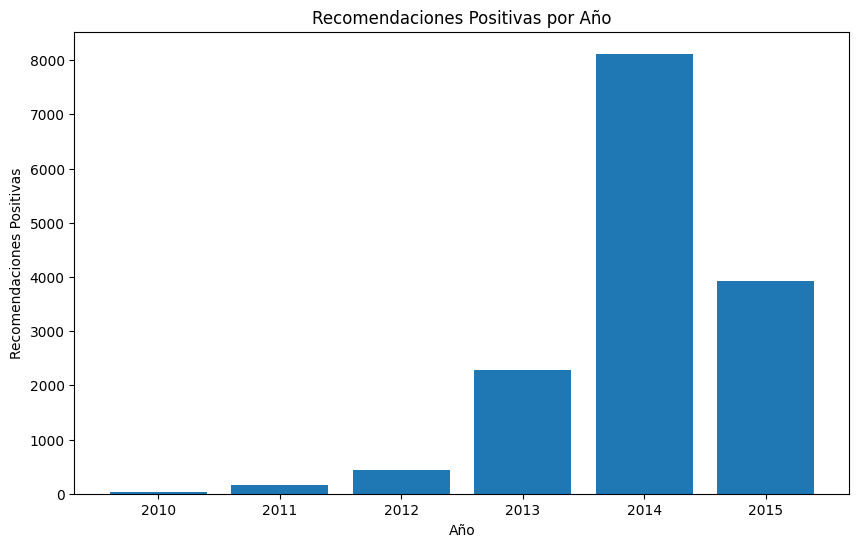

In [72]:


# Filtro las recomendaciones positivas (sentiment_analysis == 2)
positivas = dfCopy[dfCopy['sentiment_analysis'] == 2]

# Extraigo el año de la columna 'posted_date'
positivas['year'] = positivas['posted_date'].dt.year

# Agrupo por año y cuento las recomendaciones positivas
recomendaciones_por_año = positivas['year'].value_counts().sort_index()

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(recomendaciones_por_año.index, recomendaciones_por_año.values)
plt.xlabel('Año')
plt.ylabel('Recomendaciones Positivas')
plt.title('Recomendaciones Positivas por Año')
plt.show()


In [73]:
# Especifico la ruta y el nombre del archivo Parquet en la carpeta del proyecto
archivo_parquet = "user_reviews.parquet"

# Guardo el DataFrame en un archivo Parquet en la carpeta del proyecto
dfCopy.to_parquet(archivo_parquet, index=False)